# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

---
## 2. Load data

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Forage\BCG\Task 2 Exploratory Data Analysis\clean_data_after_eda.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.00000,44.311375,0.00000,0.00000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.00000,44.385450,0.00000,0.00000


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Forage\BCG\Task 2 Exploratory Data Analysis\price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


## Merge diff to df

In [6]:
df=pd.merge(df, diff, on='id', how='left')

## From the dataframe we have some datetime object, let's calculate tenure for each customer out of it then drop the columns

In [7]:
date_col=df.select_dtypes('datetime64[ns]').columns
date_col

Index(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], dtype='object')

In [8]:
df['tenure']=(df.date_end-df.date_activ).astype(str)
df['tenure']=(df['tenure'].str.replace(' days','').astype(int)/365).round()

## Drop datetime columns


In [9]:
df=df.drop(date_col, axis=1)

## Drop id column

In [10]:
df=df.drop('id', axis=1)

## Handle Categorical column

In [11]:
df.has_gas=df.has_gas.map({'t':1,'f':0})

## One Hot Encoding

In [12]:
df=pd.get_dummies(df)

In [13]:
df

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,tenure,channel_sales_MISSING,channel_sales_epumfxlbckeskwekxbiuasklxalciiuu,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_MISSING,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,43.648,1,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,0.020057,3.700961,3.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,-0.003767,0.177779,7.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,-0.004670,0.177779,6.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,-0.004547,0.177779,6.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,0,52.32,44.91,44.91,1,47.98,6,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,-0.006192,0.162916,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,27.88,2,381.77,4,15.000,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000,-0.008653,0.177779,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14602,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,0.00,1,90.34,3,6.000,1,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418,-0.007395,0.236694,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14603,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,39.84,1,20.38,4,15.935,1,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,-0.006192,0.162916,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14604,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0,0.00,13.08,13.08,1,0.96,3,11.000,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,-0.003767,0.177779,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## Build the model

### Split the model

In [14]:
X = df.drop('churn', axis=1)
y = df['churn']

In [15]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [186]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10224, 41) (10224,)
(4382, 41) (4382,)


## Handle imbalance using SMOTE

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
sm = SMOTE(sampling_strategy='minority')
X_train_resampled,y_train_resampled=sm.fit_resample(X_train, y_train)

## Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, f1_score

In [190]:
rf_model=RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced')

In [191]:
y_pred=rf_model.predict(X_test)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3958
           1       0.44      0.07      0.12       424

    accuracy                           0.90      4382
   macro avg       0.67      0.53      0.53      4382
weighted avg       0.86      0.90      0.87      4382



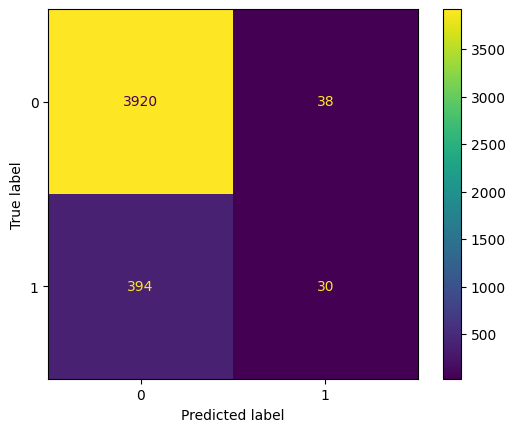

In [193]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## Evaluation:


#### Retained: 
The Model performed well in predicting Retained (Class 0). It demonstrates an exceptional precision of 91%, ensuring that the majority of Retained cases are accurate.
Also, the recall accounts to 99%, indicating an impressive ability to correctly identify almost all actual retained instances.
The resulting F1-Score of 0.95 reflects a balance between precision and recall.

#### Churned:
For Churned instances, the precision of the model is lower amounting to 44%, meaning less than half of the predicted churned instances are correct. The recall for churned instances is low at 7%, meaning that the model isn't doing well for a large portion of actual churned cases. Consequently, the F1-Score for churned instances at 0.12, showing an imbalance between precision and recall. This highlights the challenges the model faces in effectively ideentifying and predicting customer churn.

#### Overall:
Overall, the model accuracy is still impressive striking 90%. While accuracy provides a general overview of the model's correctness, the specific performance issues in predicting churned instances points the need for improvements. Enhancing the model's ability to identify and correctly classify churned instances is crucial for improving the model ability in predicting customer behavior and making strategic decisions.

In [202]:
feat_imp=pd.DataFrame({'Feature':X_train.columns,'Importance':rf_model.feature_importances_}).sort_values('Importance')

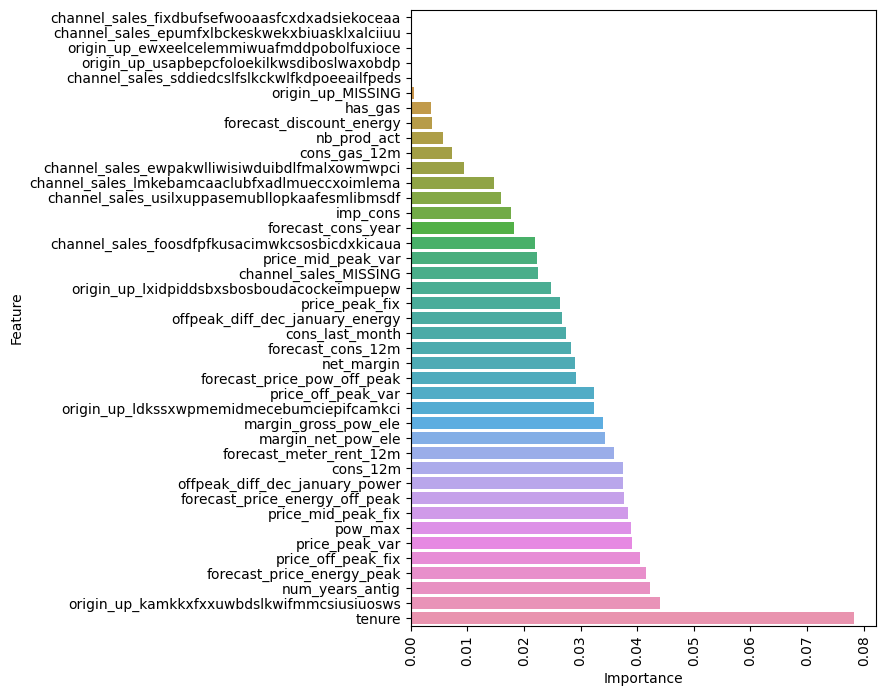

In [211]:
plt.figure(figsize=(6, 8))
sns.barplot(data=feat_imp, y='Feature', x='Importance',orient='h')
plt.xticks(rotation=90);

## Bonus Task: Impact of Discount

In [247]:
bonus = X_test.copy()

In [248]:
bonus['churn_probability']=rf_model.predict_proba(X_test)[:,1]

In [249]:
bonus['churn']=y_test

## Calculate Possible Revenue
For the next 12 months we try to calculate from the forecast price and forecast consumption the forecast revenue i.e the revenue that should be generated and check to see if discount was offered for those that were predicted to churned (assuming the discount won't make them churn) to see the impact.

#### To calculate the revenue 
forecast_revenue= forecast_cons_12m/2 * (forecast_price_energy_peak + forecast_price_energy_off_peak) 

In [277]:
bonus['forecast_revenue']=(bonus['forecast_cons_12m']/2) * (bonus['forecast_price_energy_peak']+bonus['forecast_price_energy_off_peak'])

it should be noted that customers that churned, we wouldn't generate any revenue from them, so let's make forecast_revenue for them zero (0)

In [282]:
bonus.loc[bonus['churn'] == 1, 'forecast_revenue'] = 0

## Assuming Discount was offered to customers that the model predict will churn
Let's check what the possible revenue could have been assuming discount of 20% was offered to the customers that the model deemed likely to churn

In [284]:
bonus['forecast_revenue_discount']=(bonus['forecast_cons_12m']/2) * (bonus['forecast_price_energy_peak']+bonus['forecast_price_energy_off_peak'])

In [287]:
bonus.loc[bonus['churn_probability'] > 0.5, 'forecast_revenue_discount'] = bonus.loc[bonus['churn_probability'] > 0.5, 'forecast_revenue_discount'] *(1-0.2)

For Customers that churned but was predicted not to churn due to error in the model, no revenue will be made from them so let's assign such values to zero(0)

In [300]:
bonus.loc[(bonus['churn']==1) & (bonus['churn_probability']<=0.5), 'forecast_revenue_discount'] =0

## Final Revenue

In [304]:
bonus.sum()[['forecast_revenue','forecast_revenue_discount']]

forecast_revenue             711583.830058
forecast_revenue_discount    760079.238973
dtype: float64

## Conclusion:

"The implementation of a 20% discount strategy targeted at customers likely to churn resulted in a noteworthy increase in forecasted revenue, reaching approximately 760,000 units. In contrast, when no discount was offered, the forecasted revenue stood at around 710,000 units. This positive outcome underscores the potential of the discount proposition to enhance overall revenue.

However, it's crucial to recognize that this analysis rests on the assumption that customers do not churn when presented with a discount. This simplifying assumption, while useful for initial exploration, may not fully capture the complexity of customer behavior. Churn is influenced by a variety of factors beyond price alone.

Additionally, the forecasted prices used in the analysis were derived from certain forecasts, while others were excluded due to a lack of clarity regarding their role. It's essential to acknowledge that the forecasted prices may play a significant role in customer behavior, and a more comprehensive understanding of these factors is necessary for a more nuanced analysis.

Furthermore, to refine the model and better align it with real-world scenarios, it's advisable to check customer behavior on discount using true data. This would involve validating the model's predictions against actual customer responses to discounts, ensuring that the model is robust and effective when applied to real-world situations.

In conclusion, while the observed positive impact on revenue is promising, further exploration and refinement of assumptions, considering a broader range of factors influencing churn, clarifying the role of forecasted prices, and validating the model with true data will contribute to a more comprehensive and actionableanalysis."